In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import random
import sklearn

In [2]:
!kaggle datasets download -d sahilyagnik/olivetti-faces

Dataset URL: https://www.kaggle.com/datasets/sahilyagnik/olivetti-faces
License(s): unknown
  0% 0.00/1.81M [00:00<?, ?B/s]
100% 1.81M/1.81M [00:00<00:00, 106MB/s]


In [3]:
!unzip olivetti-faces.zip

Archive:  olivetti-faces.zip
  inflating: olivetti_faces.npy      
  inflating: olivetti_faces_target.npy  


In [4]:
data = np.load('/content/olivetti_faces.npy')
target = np.load('/content/olivetti_faces_target.npy')
data, target

(array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
          0.16528925, 0.17355372],
         [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033,
          0.16115703, 0.16528925],
         [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256,
          0.16115703, 0.1570248 ]],
 
        [[0.45454547, 0.47107437, 0.5123967 , ..., 0.19008264,
          0.18595041, 0.18595041],
         [0.446281  , 0.48347107, 0.5206612 , ..., 0.21487603,
          0.2107438 , 0.2107438 ],
         [0.49586776, 0.5165289 , 0.53305787, ..., 0.20247933,
          0.20661157, 0.20661157],
         ...,
         [0.77272725, 0.78099173, 0.7933884 , ..., 0.1446281 ,
          0.1446281 , 0.

In [5]:
print(len(data))
print(len(target))

400
400


In [8]:
data[0]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083, 0.3305785 ,
        0.30578512],
       [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083, 0.338843  ,
        0.3140496 ],
       [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528, 0.338843  ,
        0.29752067],
       ...,
       [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256, 0.16528925,
        0.17355372],
       [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033, 0.16115703,
        0.16528925],
       [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256, 0.16115703,
        0.1570248 ]], dtype=float32)

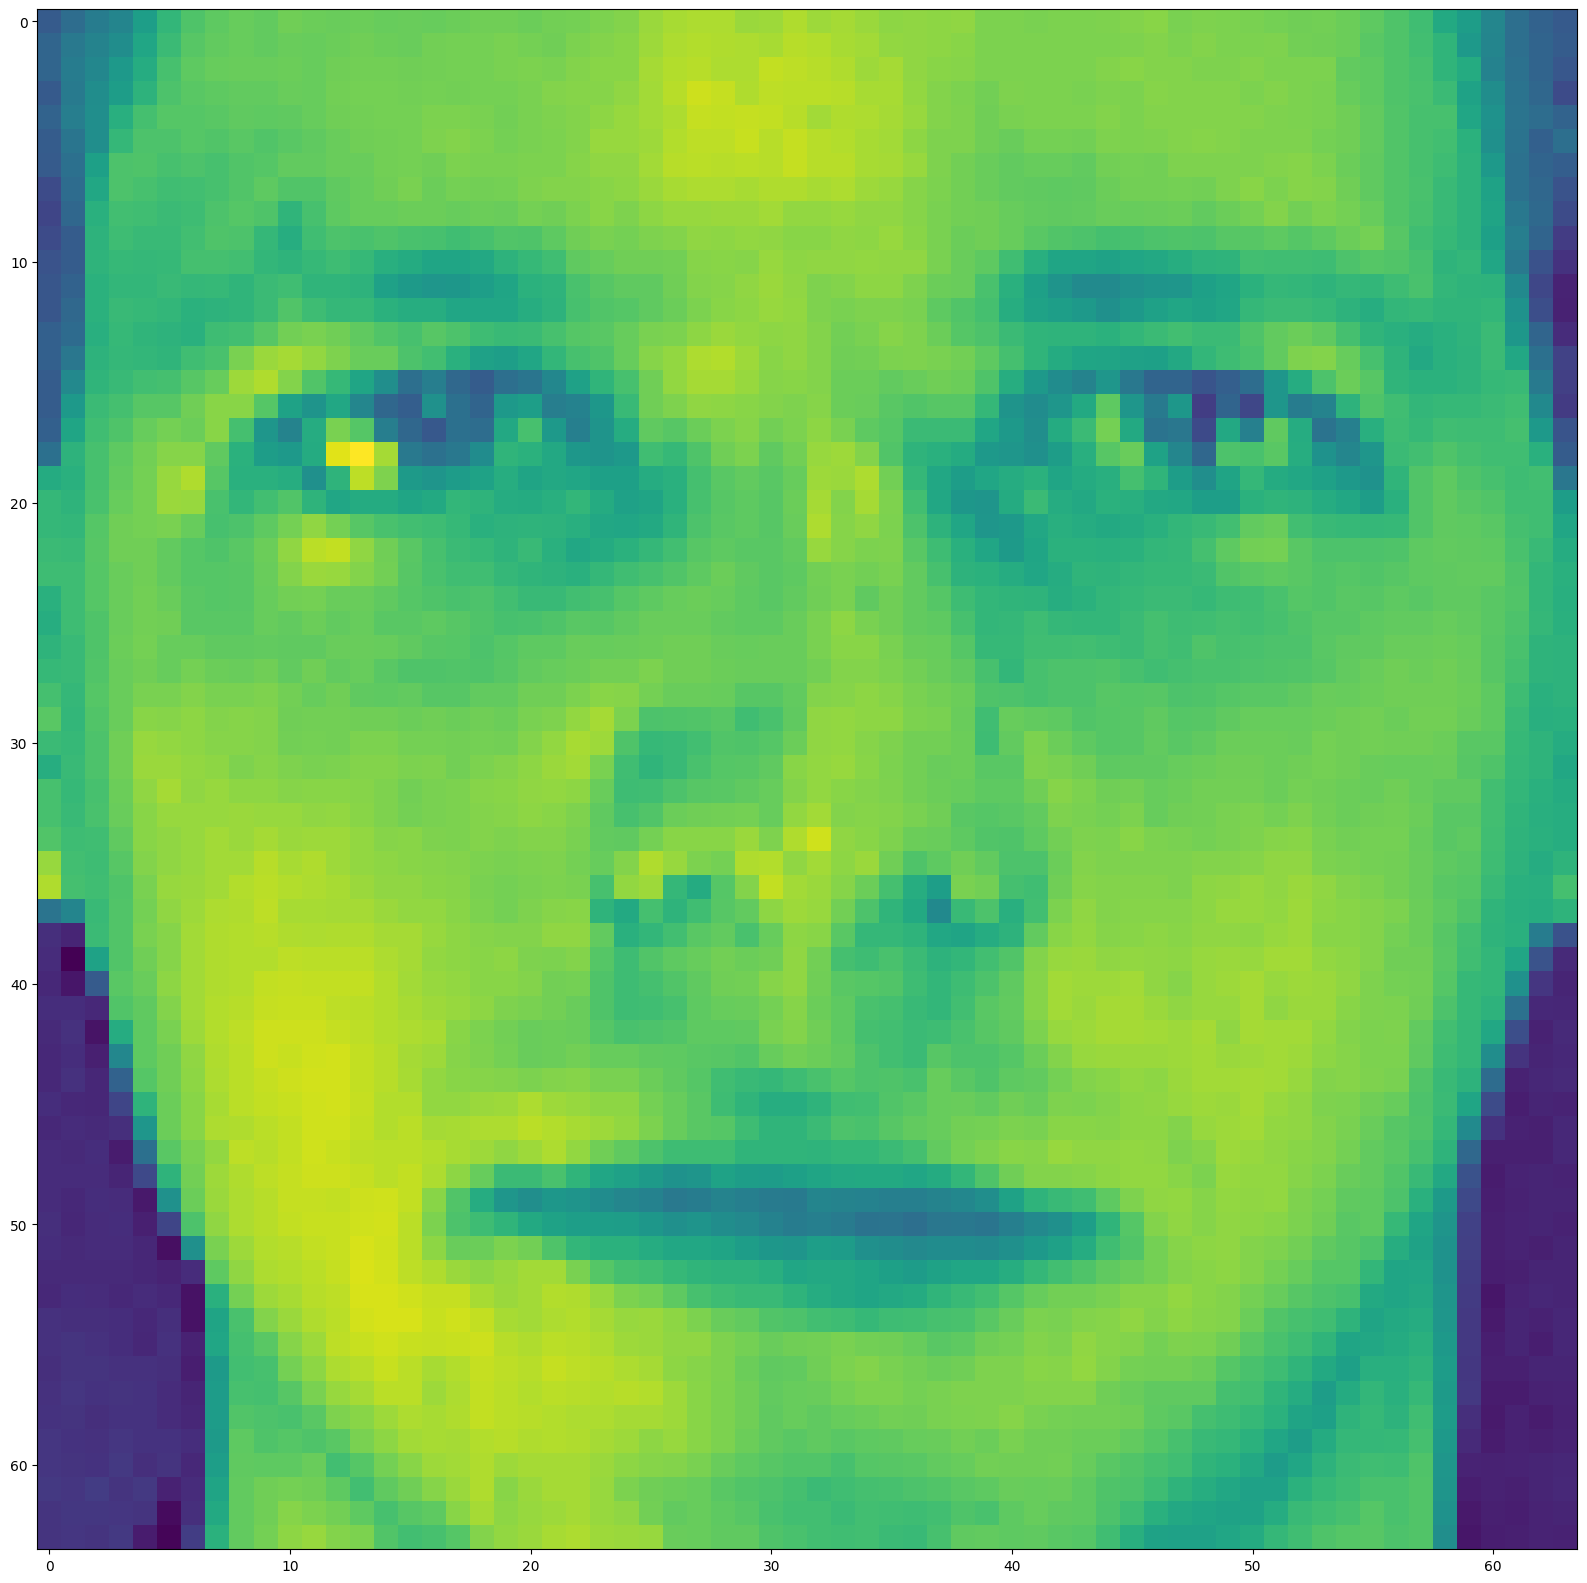

In [9]:
fig = plt.figure(figsize=(20, 20))
plt.imshow(data[0])

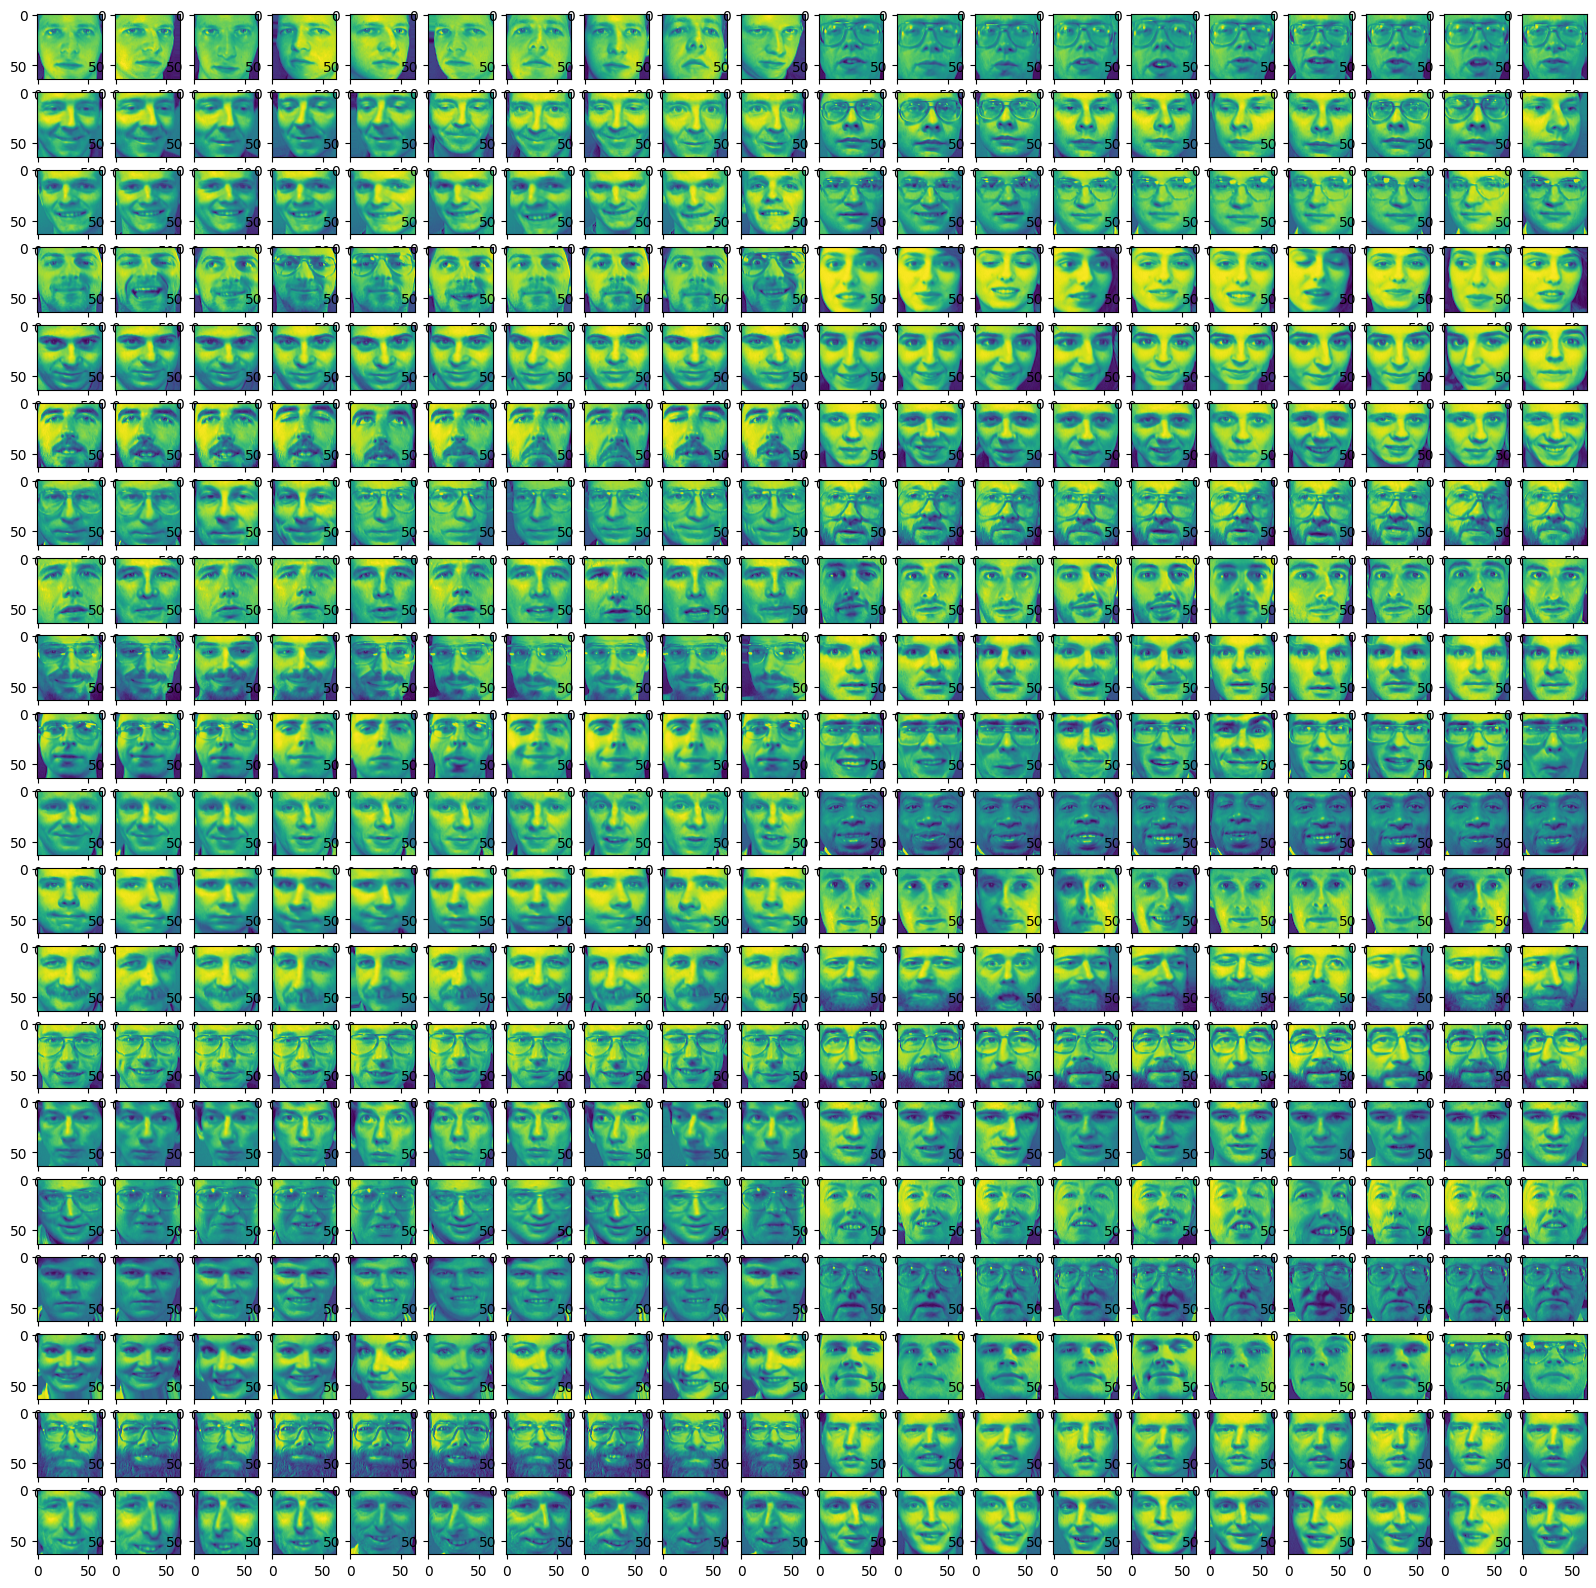

In [13]:
fig = plt.figure(figsize=(20,20))
for x in range(400):
    plt.subplot(20,20,x+1)
    plt.imshow(data[x])
plt.show()

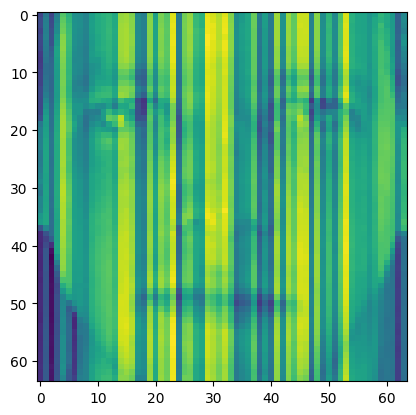

In [18]:
noisy = data + data.std()*4.5*np.random.random(64)
plt.imshow(noisy[0])

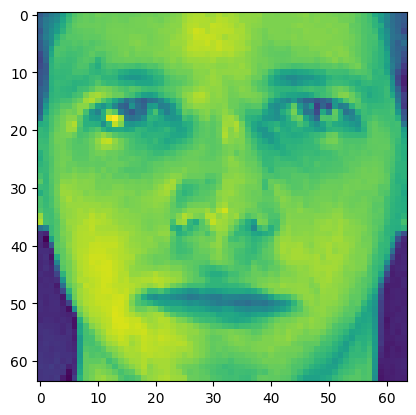

In [19]:
plt.imshow(data[0])

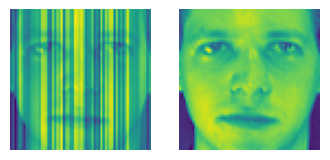

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(4, 4))
axes[0].imshow((noisy[0]))
axes[0].axis('off')
axes[1].imshow(data[0])
axes[1].axis('off')

plt.show()

In [27]:
train = data[:320]
test = data[320:]
noisy_train = noisy[:320]
noisy_test = noisy[320:]
train = train.reshape(320, 64, 64, 1)
test = test.reshape(80, 64, 64, 1)
noisy_train = noisy_train.reshape(320, 64, 64, 1)
noisy_test = noisy_test.reshape(80, 64, 64, 1)

In [44]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

In [45]:
input_img = Input(shape=(64, 64, 1))

nn = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
nn = MaxPooling2D((2, 2), padding='same')(nn)
nn = Conv2D(64, (3, 3), activation='relu', padding='same')(nn)
encoded = MaxPooling2D((2, 2), padding='same')(nn)


nn = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
nn = UpSampling2D((2, 2))(nn)
nn = Conv2D(64, (3, 3), activation='relu', padding='same')(nn)
nn = UpSampling2D((2, 2))(nn)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(nn)

In [46]:
# Create the autoencoder model
autoencoder = tf.keras.Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Print the model summary
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        3692

In [47]:
autoencoder.fit(noisy_train, train,
                epochs=800,
                validation_data=(noisy_test, test))

Epoch 1/800
10/10 [==============================] - 11s 940ms/step - loss: 0.6817 - val_loss: 0.6917
Epoch 2/800
10/10 [==============================] - 10s 969ms/step - loss: 0.6733 - val_loss: 0.6833
Epoch 3/800
10/10 [==============================] - 10s 1s/step - loss: 0.6634 - val_loss: 0.6652
Epoch 4/800
10/10 [==============================] - 10s 983ms/step - loss: 0.6549 - val_loss: 0.6573
Epoch 5/800
10/10 [==============================] - 9s 851ms/step - loss: 0.6462 - val_loss: 0.6523
Epoch 6/800
10/10 [==============================] - 10s 1s/step - loss: 0.6438 - val_loss: 0.6564
Epoch 7/800
10/10 [==============================] - 10s 983ms/step - loss: 0.6416 - val_loss: 0.6477
Epoch 8/800
10/10 [==============================] - 11s 1s/step - loss: 0.6375 - val_loss: 0.6450
Epoch 9/800
10/10 [==============================] - 10s 1s/step - loss: 0.6359 - val_loss: 0.6434
Epoch 10/800
10/10 [==============================] - 11s 1s/step - loss: 0.6358 - val_loss: 0.

### Plotting the denoised image, then the decoded image from the encoder, which successfully removes the noise from the original image and resembles the original.

In [48]:
decoded_imgs = autoencoder.predict(noisy_test)

3/3 [==============================] - 1s 135ms/step


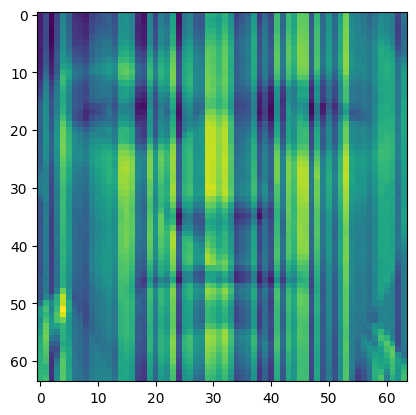

In [49]:
plt.imshow(noisy_test[0].reshape(64, 64))

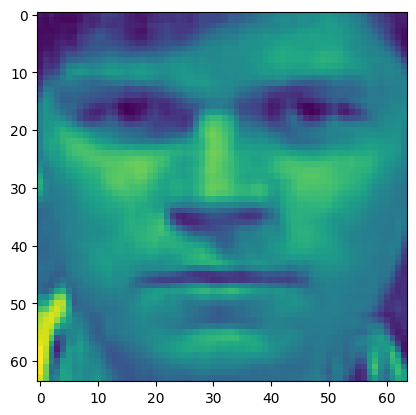

In [50]:
plt.imshow(decoded_imgs[0].reshape(64, 64))

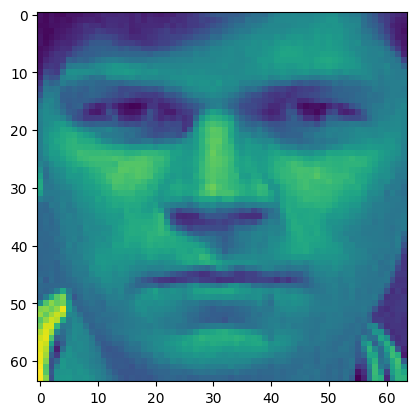

In [51]:
plt.imshow(test[0].reshape(64,64))